In [1]:
# Import Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from pandas.plotting import parallel_coordinates
from sklearn.metrics import silhouette_score
from sklearn import metrics

In [8]:
#Load data from csv file into a data frame
iris_data = pd.read_csv("iris.csv")

In [27]:
#First 10 lines of our data
iris_data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [28]:
#Get statistics about the data
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


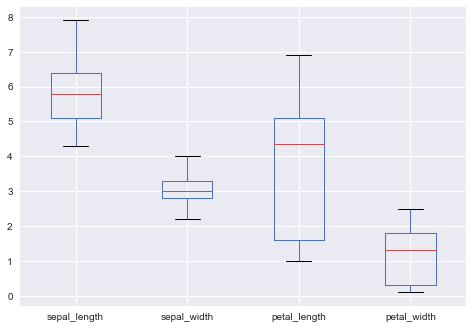

In [26]:
# box and whisker plots to show upper , lower quartile and median
iris_data.plot(kind='box')
plt.show()

In [13]:
#Finds counts of each iris flower species
iris_data.species.value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

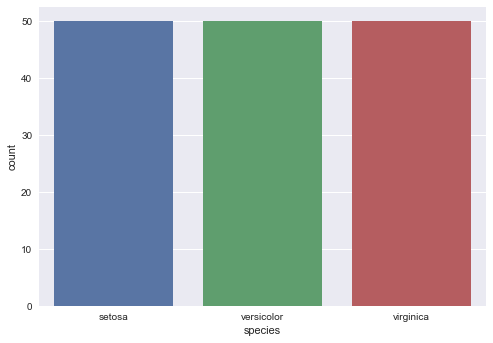

In [25]:
# Plot the counts for each species
sns.countplot(x='species',data=iris_data)
plt.show()


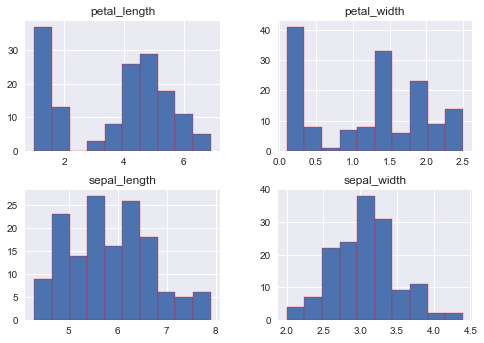

In [30]:
#Plot histograms for each feature
iris_data.hist(edgecolor='red')
plt.show()

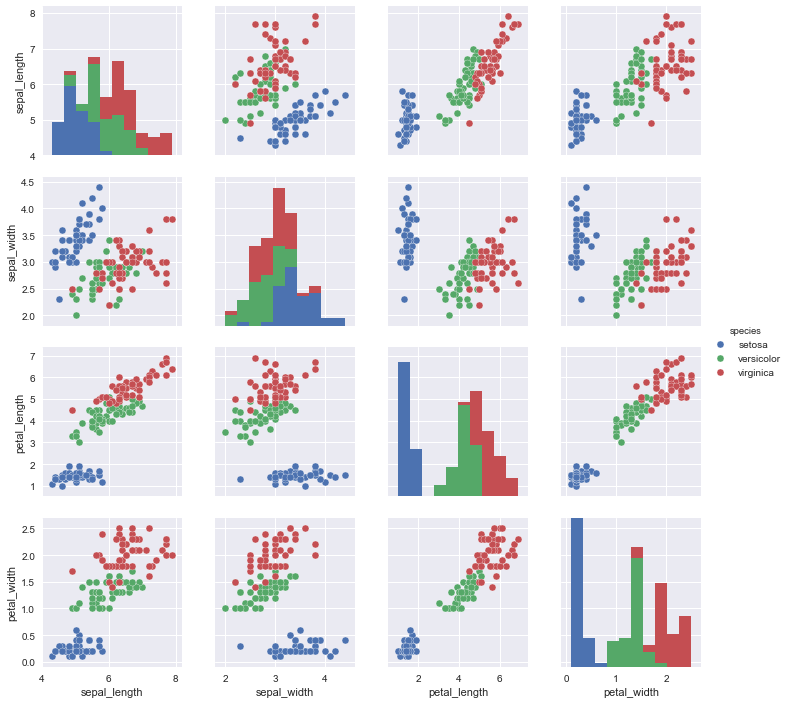

In [86]:
# Plot the pairwise relationship between features
# Note that the setosa cluster is quite separate in each pairwise feature plot
sns.pairplot(iris_data, hue="species")
#sns.pairplot(iris_data)
plt.show()

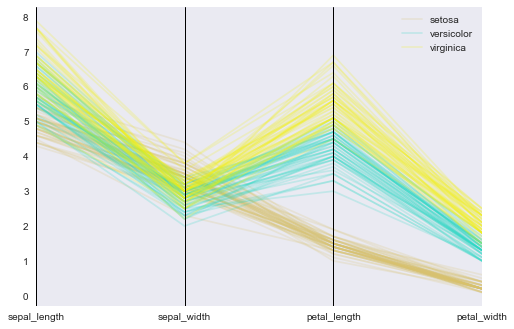

In [35]:
# To view multiple features together you can plot a parallel_coordinates plot
parallel_coordinates(iris_data, 'species', alpha=0.2)
plt.show()

In [49]:
#Extract only the numeric features (excluse the labels) to be passed to K-Means
iris_features = iris_data[['sepal_length','sepal_width','petal_length','petal_width']]

In [113]:
labels = iris_data.species

In [50]:
# validate results
iris_features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [89]:
# Initialize K-Means
kmeans = KMeans(n_clusters=3, random_state = 10)

In [90]:
# Run K-Means
kmeans.fit(iris_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

In [93]:
# Display the cluster centers
kmeans.cluster_centers_

array([[ 5.006     ,  3.418     ,  1.464     ,  0.244     ],
       [ 5.9016129 ,  2.7483871 ,  4.39354839,  1.43387097],
       [ 6.85      ,  3.07368421,  5.74210526,  2.07105263]])

In [75]:
# Display the cluster labels associated with each data point
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [76]:
#Show the frequency count(ie number of members) for each cluster
pd.Series(kmeans.labels_).value_counts()

1    62
0    50
2    38
dtype: int64

In [77]:
# Color Maps to show clusters
colmap = {1: 'r', 2: 'g', 3: 'b', 4:'y', 5:'m' ,0:'k',6:'c',7:'.25',8:'.5',9:'.6',10 :'.75'}
colors = list(map(lambda x: colmap[x], kmeans.labels_))

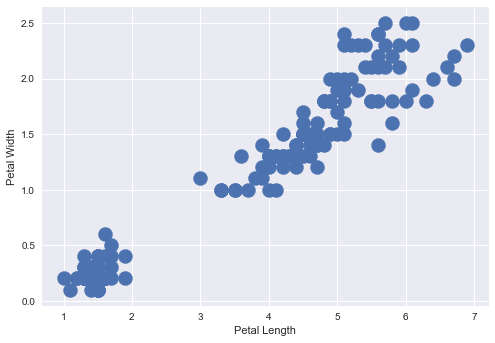

In [83]:
#Without Clustering
plt.scatter(iris_features.petal_length, iris_features.petal_width, s=200)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

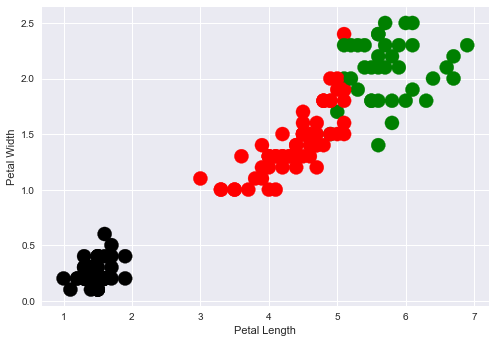

In [84]:
#With Clustering
plt.scatter(iris_features.petal_length, iris_features.petal_width, s=200, c= colors)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

In [119]:
#Compare with Ground Truth to find the overall accuracy metrics
print('clusters\thomo\tcompl\tv-meas\tARI\tAMI')
print('\t%s\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % ( np.unique(kmeans.labels_).size, 
             metrics.homogeneity_score(labels, kmeans.labels_),
             metrics.completeness_score(labels, kmeans.labels_),
             metrics.v_measure_score(labels, kmeans.labels_),
             metrics.adjusted_rand_score(labels, kmeans.labels_),
             metrics.adjusted_mutual_info_score(labels,  kmeans.labels_),
            ))

clusters	homo	compl	v-meas	ARI	AMI
	3	0.751	0.765	0.758	0.730	0.748


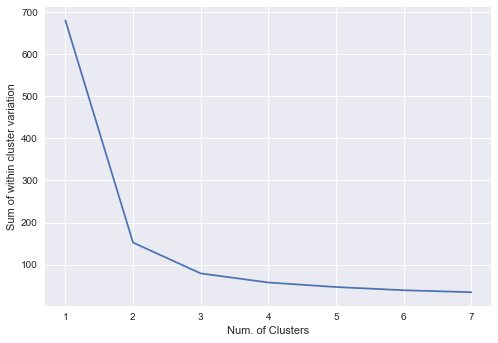

In [110]:
# Run K-Means for 8 clusters and find the optimal cluster
#Goal is to minimize total within cluster variation (inertia).  
max_clusters = 8
alist = []
for n_clusters in range(1,max_clusters):
    kmeansC = KMeans(init='k-means++', n_clusters=n_clusters, random_state=0).fit(iris_features)
    alist.append(kmeansC.inertia_)
plt.xlabel("Num. of Clusters")
plt.ylabel("Sum of within cluster variation")
plt.plot(range(1,max_clusters),alist)
plt.show()


In [112]:
#Cluster Evaluation - Silhouette Scores for clusters 2 to 8
for n_clusters in range(2,8):
    kmeansC = KMeans(init='k-means++', n_clusters=n_clusters, random_state=0).fit(iris_features)
    classes = kmeansC.predict(iris_features)
    print(' Silhouette Score for Kmeans - Cluster',n_clusters,silhouette_score(iris_features, classes, metric='euclidean'))

 Silhouette Score for Kmeans - Cluster 2 0.680813620294
 Silhouette Score for Kmeans - Cluster 3 0.55259194455
 Silhouette Score for Kmeans - Cluster 4 0.49782569011
 Silhouette Score for Kmeans - Cluster 5 0.492855591832
 Silhouette Score for Kmeans - Cluster 6 0.368205696827
 Silhouette Score for Kmeans - Cluster 7 0.360059799733


Cophenetic distance: 0.86357244036


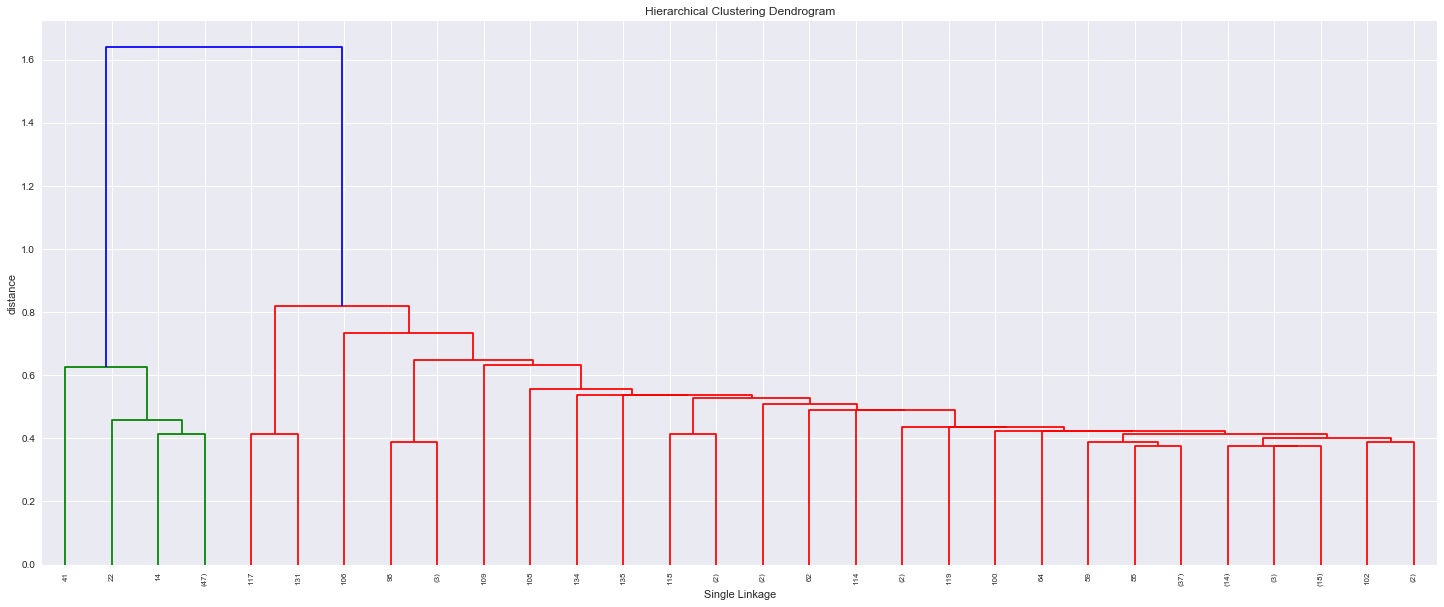

In [124]:
# <<<<<--------Optional .. Hierarchical Clustering -------->>>>>
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.spatial.distance import euclidean

Z = linkage(iris_features, 'single')
c, coph_dists = cophenet(Z, pdist(iris_features))
print("Cophenetic distance:",c)

#Plotting single linkage dendogram 
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Single Linkage')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    orientation= 'top',
    truncate_mode= 'lastp'
)
plt.show() 